# Implementasi Content-Based Filtering dengan TensorFlow

Di **lab praktik**, kita akan melihat bagaimana cara mengimplementasikan *content-based filtering* menggunakan TensorFlow. Dalam video ini, saya akan menjelaskan beberapa konsep kunci dalam kode yang bisa kamu coba. Mari kita lihat bersama.

## Jaringan Pengguna dan Film

Ingat bahwa kode kita dimulai dengan *user network* (jaringan pengguna) serta *movie network* (jaringan film). Cara implementasi ini di TensorFlow mirip dengan implementasi *neural network* (jaringan saraf) menggunakan beberapa lapisan *dense*. Kita akan menggunakan *sequential model*.

Dalam contoh ini, kita memiliki dua *dense layers* dengan jumlah *hidden units* yang sudah ditentukan, dan *layer* terakhir memiliki 32 unit yang menghasilkan 32 angka sebagai output. Untuk jaringan film (yang saya sebut sebagai *item network* karena film adalah item dalam konteks ini), kodenya terlihat seperti ini:

```python
# Jaringan item (movie network)
item_network = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32)
])
Sekali lagi, kita menggunakan lapisan tersembunyi (hidden layers) dengan fungsi aktivasi relu sebagai pilihan default.

Memberikan Input pada Jaringan Neural
Langkah selanjutnya, kita perlu memberi tahu TensorFlow Keras bagaimana memberikan user features (fitur pengguna) atau item features (fitur item, yaitu fitur film) ke dua jaringan neural. Berikut adalah sintaks untuk melakukannya:

# Memberi input fitur pengguna
user_vector = user_network(user_input)
# Normalisasi vektor pengguna
user_vector = tf.linalg.l2_normalize(user_vector, axis=1)
Sintaks di atas mengekstraksi fitur input pengguna dan memberikannya ke user network yang telah kita definisikan. Ini akan menghitung vu, yaitu vektor pengguna. Satu langkah tambahan yang penting adalah normalisasi vektor vu sehingga panjangnya menjadi satu, yang disebut juga dengan l2 norm.

# Normalisasi l2 untuk item (movie)
item_vector = item_network(item_input)
item_vector = tf.linalg.l2_normalize(item_vector, axis=1)
```
Kita juga melakukan hal yang sama untuk jaringan item (item network), menghitung vm, yaitu vektor film.

Menghitung Dot Product
Setelah kita mendapatkan vu dan vm, kita harus mengambil dot product dari dua vektor ini. TensorFlow Keras menyediakan lapisan khusus untuk ini:

# Menghitung dot product antara vektor pengguna dan item
output = tf.keras.layers.Dot(axes=1)([user_vector, item_vector])
Lapisan dot ini menghitung hasil kali dot product antara dua vektor. Ini akan memberikan output akhir dari jaringan neural, yaitu prediksi akhir kita.

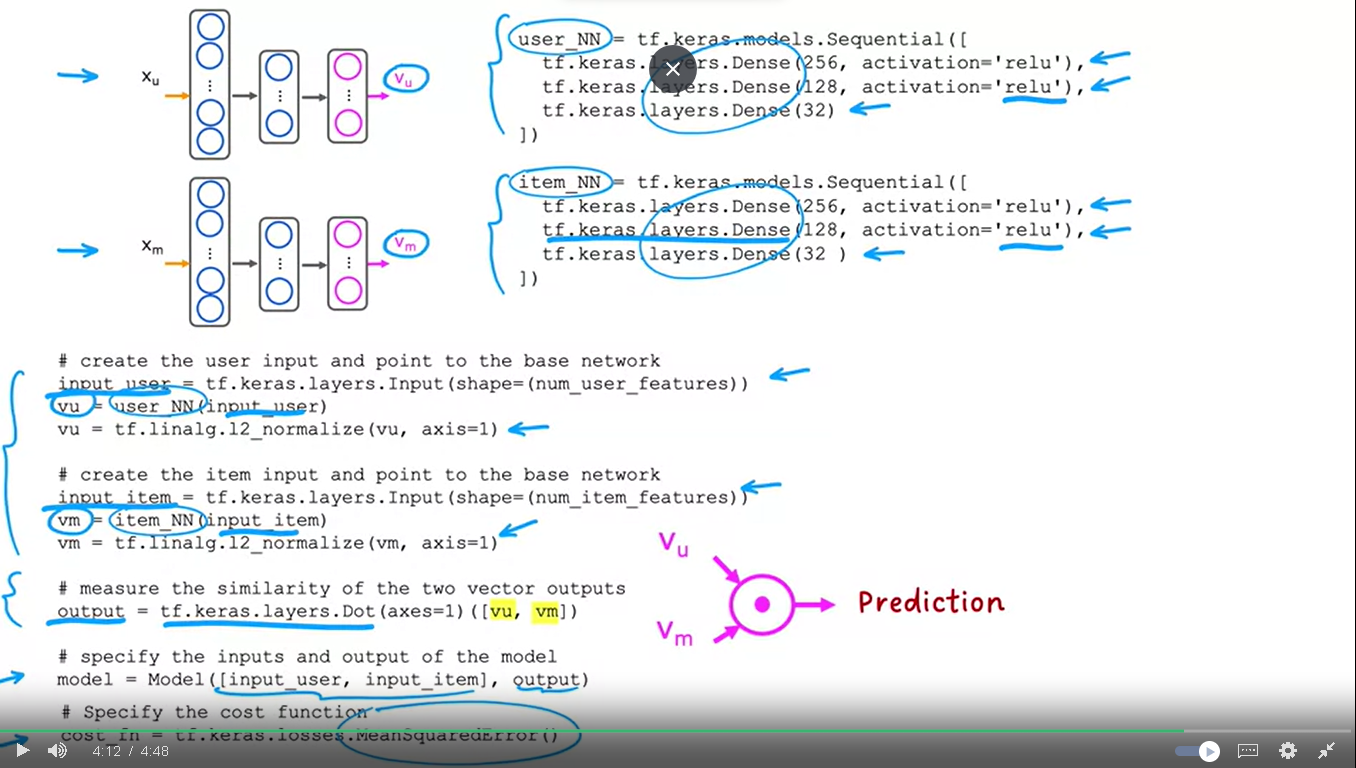